In [ ]:
# Import important Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow charts to appear inside the notebook
%matplotlib inline


In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df.isnull().sum()


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [ ]:
df = df.drop(columns=['homepage', 'tagline', 'status'])


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])


In [ ]:
df['release_year'] = df['release_date'].dt.year


In [ ]:
df.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012.0


In [ ]:
# Summary of numeric columns
df.describe()


,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year
count,4.803000e+03,4803.000000,4803.000000,4802,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000
mean,2.904504e+07,57165.484281,21.492301,2002-12-27 23:45:54.352353280,8.226064e+07,106.875859,6.092172,690.217989,2002.468763
min,0.000000e+00,5.000000,0.000000,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,7.900000e+05,9014.500000,4.668070,1999-07-14 00:00:00,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,14629.000000,12.921594,2005-10-03 00:00:00,1.917000e+07,103.000000,6.200000,235.000000,2005.000000
75%,4.000000e+07,58610.500000,28.313505,2011-02-16 00:00:00,9.291719e+07,118.000000,6.800000,737.000000,2011.000000
max,3.800000e+08,459488.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000
std,4.072239e+07,88694.614033,31.816650,NaN,1.628571e+08,22.611935,1.194612,1234.585891,12.414354


In [ ]:
top_revenue = df.sort_values('revenue', ascending=False).head(10)
top_revenue[['title', 'revenue']]


,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


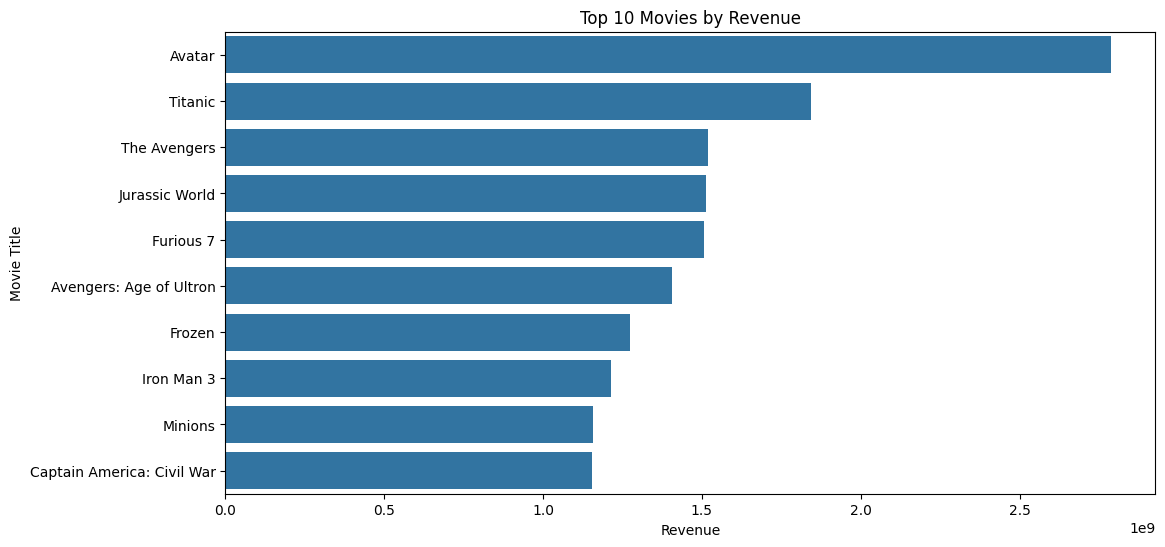

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y='title', data=top_revenue)
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()


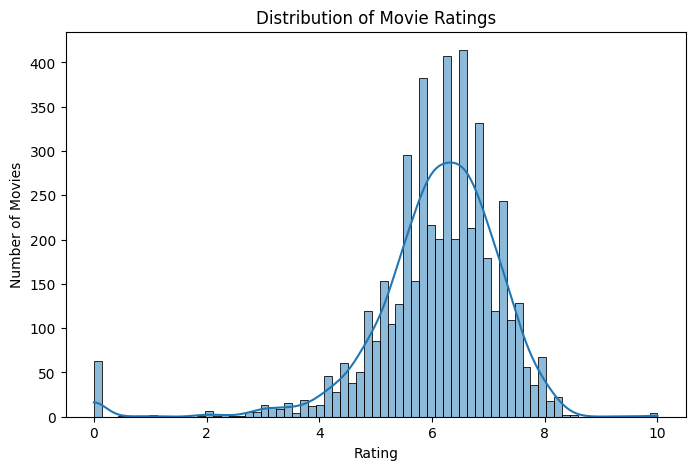

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['vote_average'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


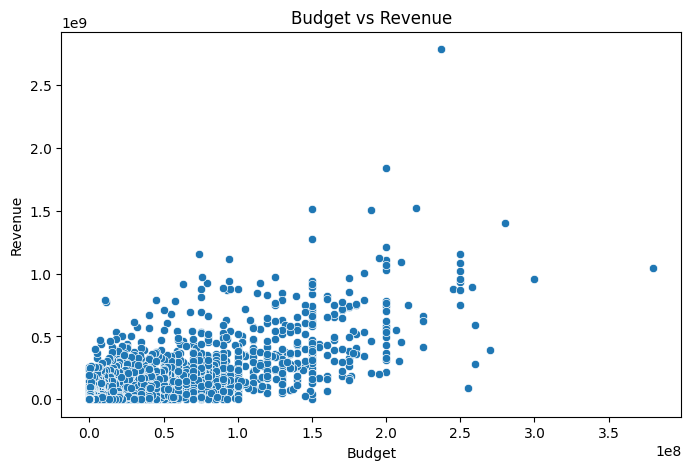

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


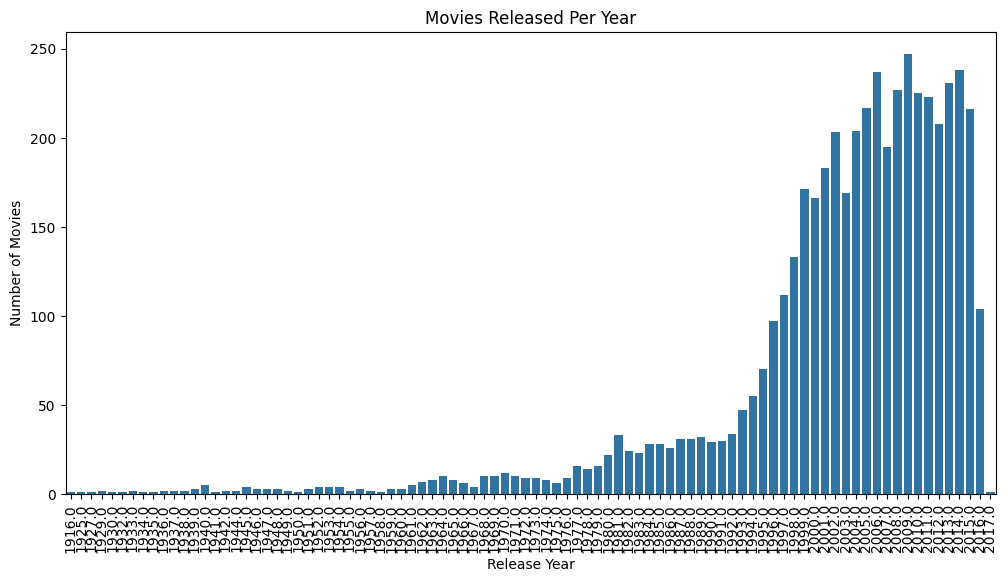

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year')
plt.title('Movies Released Per Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


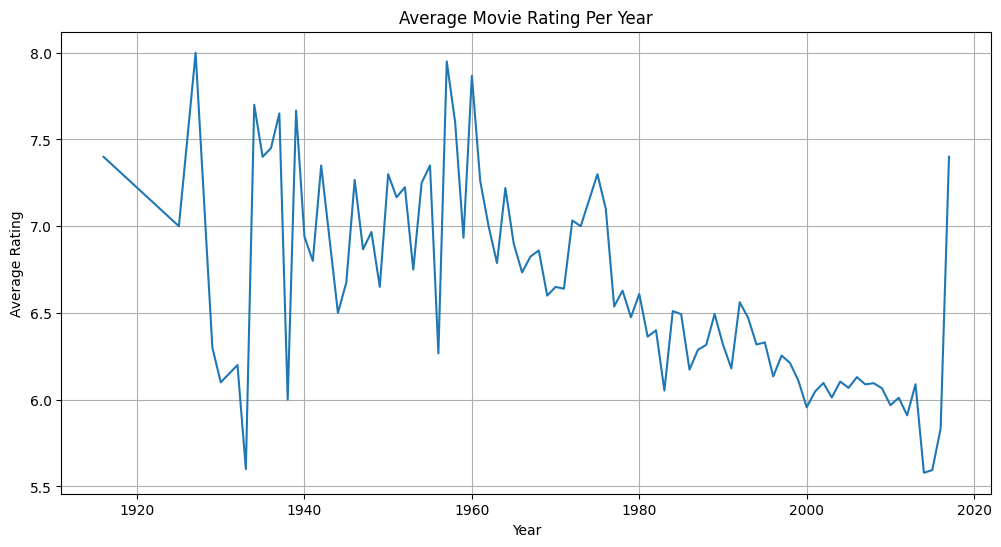

In [ ]:
avg_rating_per_year = df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(12,6))
avg_rating_per_year.plot()
plt.title('Average Movie Rating Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [ ]:
import ast

# Convert genre JSON string into a list of genre names
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df[['title', 'genres']].head()


,title,genres
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"


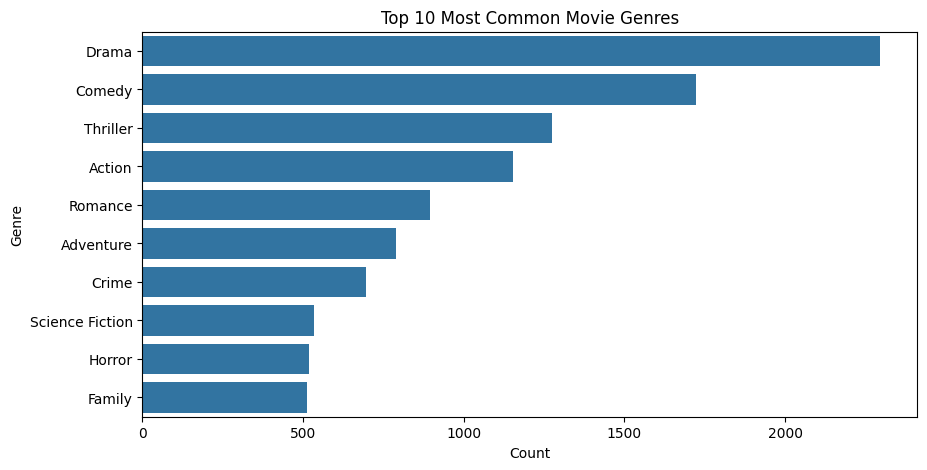

In [ ]:
from collections import Counter

genre_counter = Counter()
for genres in df['genres']:
    genre_counter.update(genres)

# Top 10 genres
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title('Top 10 Most Common Movie Genres')
plt.show()


In [ ]:
import csv

credits = pd.read_csv("tmdb_5000_credits.csv", quoting=csv.QUOTE_NONE, encoding='utf-8', on_bad_lines='skip')
credits.head()


<ipython-input-25-846010577>:3: DtypeWarning: Columns (513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,7

movie_id  \
19995 Avatar                                   "[{""cast_id"": 242 ""character"": ""Jake Sully""                ""credit_id"": ""5602a8a7c3a3685532001c9a"" ""gender"": 2 ""id"": 65731 ""name"": ""Sam Worthington"" ""order"": 0} {""cast_id"": 3  ""character"": ""Neytiri""          ""credit_id"": ""52fe48009251416c750ac9cb"" ""gender"": 1 ""id"": 8691  ""name"": ""Zoe Saldana""   ""order"": 1} {""cast_id"": 25 ""character"": ""Dr. Grace Augustine""       ""credit_id"": ""52fe48009251416c750aca39"" ""gender"": 1 ""id"": 10205 ""name"": ""Sigourney Weaver"" ""order"": 2} {""cast_id"": 4  ""character"": ""Col. Quaritch""                   ""credit_id"": ""52fe48009251416c750ac9cf"" ""gender"": 2 ""id"": 32747 ""name"": ""Stephen Lang""           ""order"": 3} {""cast_id"": 5  ""character"": ""Trudy Chacon""                 ""credit_id"": ""52fe48009251416c750ac9d3"" ""gender"": 1 ""id"": 17647 ""name"": ""Michelle Rodriguez""  ""order"": 4} {""cast_id"": 8  ""character"": ""Selfridge""             ""credit_id"": ""52fe48009251416c750ac9e1"" ""gender"": 2 ""id"": 1771  ""name"": ""Giovanni Ribisi""     ""order"": 5} {""cast_id"": 7  ""character"": ""Norm Spellman""           ""credit_id"": ""52fe48009251416c750ac9dd"" ""gender"": 2 ""id"": 59231 ""name"": ""Joel David Moore""  ""order"": 6} {""cast_id"": 9  ""character"": ""Moat""                     ""credit_id"": ""52fe48009251416c750ac9e5"" ""gender"": 1 ""id"": 30485   ""name"": ""CCH Pounder""      ""order"": 7} {""cast_id"": 11 ""character"": ""Eytukan""          ""credit_id"": ""52fe48009251416c750ac9ed"" ""gender"": 2 ""id"": 15853 ""name"": ""Wes Studi""     ""order"": 8} {""cast_id"": 10 ""character"": ""Tsu'Tey""                         ""credit_id"": ""52fe48009251416c750ac9e9"" ""gender"": 2 ""id"": 10964   ""name"": ""Laz Alonso""         ""order"": 9} {""cast_id"": 12 ""character"": ""Dr. Max Patel""            ""credit_id"": ""52fe48009251416c750ac9f1"" ""gender"": 2 ""id"": 95697  ""name"": ""Dileep Rao""    ""order"": 10} {""cast_id"": 13 ""character"": ""Lyle Wainfleet""           ""credit_id"": ""52fe48009251416c750ac9f5"" ""gender"": 2 ""id"": 98215 ""name"": ""Matt Gerald""    ""order"": 11} {""cast_id"": 32 ""character"": ""Private Fike""           ""credit_id"": ""52fe48009251416c750aca5b"" ""gender"": 2 ""id"": 154153 ""name"": ""Sean Anthony Moran"" ""order"": 12}    {""cast_id"": 33                              ""character"": ""Cryo Vault Med Tech"" ""credit_id"": ""52fe48009251416c750aca5f"" ""gender"": 2 ""id"": 397312                  ""name"": ""Jason Whyte""    ""order"": 13}                               {""cast_id"": 34            ""character"": ""Venture Star Crew Chief"" ""credit_id"": ""52fe48009251416c750aca63"" ""gender"": 2      ""id"": 42317              ""name"": ""Scott Lawrence""                 ""order"": 14}              {""cast_id"": 35 ""character"": ""Lock Up Trooper""              ""credit_id"": ""52fe48009251416c750aca67"" ""gender"": 2                ""id"": 986734                               ""name"": ""Kelly Kilgour""        ""order"": 15} {""cast_id"": 36 ""character"": ""Shuttle Pilot""  ""credit_id"": ""52fe48009251416c750aca6b"" ""gender"": 0                                ""id"": 1207227         ""name"": ""James Patrick Pitt"" ""order"": 16} {""cast_id"": 37               ""character"": ""Shuttle Co-Pilot""            ""credit_id"": ""52fe48009251416c750aca6f""  ""gender"": 0             ""id"": 1180936 ""name"": ""Sean Patrick Murphy"" ""order"": 17}                       {""cast_id"": 38           ""character"": ""Shuttle Crew Chief""        ""credit_id"": ""52fe48009251416c750aca73"" ""gender"": 2 ""id"": 1019578 ""name"": ""Peter Dillon""    ""order"": 18}             {""cast_id"": 39                             ""character"": ""Tractor Operator / Troupe""    ""credit_id"": ""52fe48009251416c750aca77"" ""gender"": 0 ""id"": 91443           ""name"": ""Kevin Dorman""      ""order"": 19}                     

In [ ]:
# Merge the movie and credits datasets on 'title'
df = df.merge(credits, on='title')
df.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,movie_id,cast,crew


In [ ]:
import ast  # Needed to safely parse JSON-like strings

# Convert the 'crew' column from string to list of dictionaries
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x))

# Extract the director's name
df['director'] = df['crew'].apply(lambda crew: next((person['name'] for person in crew if person['job'] == 'Director'), None))

# Check the result
df[['title', 'director']].head()


,title,director


In [1]:
import pandas as pd

credits = pd.read_csv("tmdb_5000_credits.csv", on_bad_lines='skip', encoding='utf-8')
credits.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")  # Reload this to avoid previous merge issues
df = df.merge(credits, on='title')


In [3]:
import ast

# Parse the JSON-style string to actual Python list
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Extract director name
def get_director(crew_list):
    for person in crew_list:
        if person.get('job') == 'Director':
            return person.get('name')
    return None

df['director'] = df['crew'].apply(get_director)

# Check if it worked
df['director'].head(10).to_list()


['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Christopher Nolan',
 'Andrew Stanton',
 'Sam Raimi',
 'Byron Howard',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder']

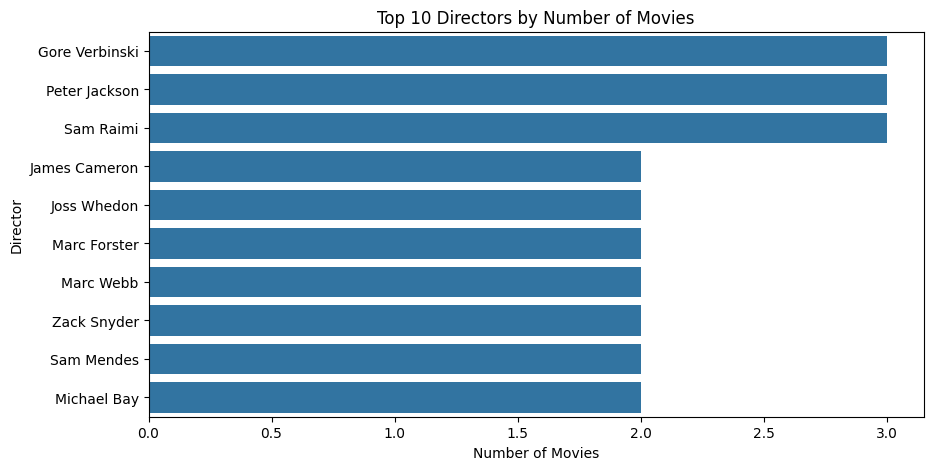

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


In [5]:
# Save cleaned dataset to a CSV file
df.to_csv("cleaned_movie_data.csv", index=False)


In [6]:
from google.colab import files
files.download("cleaned_movie_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Create a new column for profit
df['profit'] = df['revenue'] - df['budget']


In [9]:
df['is_profitable'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)


In [10]:
features = df[['budget', 'runtime', 'vote_average']]
target = df['is_profitable']

# Drop rows with missing values
df_model = pd.concat([features, target], axis=1).dropna()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_model[['budget', 'runtime', 'vote_average']]
y = df_model['is_profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [12]:
!pip install textblob
from textblob import TextBlob


In [13]:
# Create a function to get polarity
def get_sentiment(text):
    if not text or pd.isnull(text):
        return 0
    return TextBlob(text).sentiment.polarity

df['overview_sentiment'] = df['overview'].apply(get_sentiment)
df[['title', 'overview', 'overview_sentiment']].head()


,title,overview,overview_sentiment
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.041667
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",-0.083333
2,Spectre,A cryptic message from Bond’s past sends him o...,-0.306250
3,The Dark Knight Rises,Following the death of District Attorney Harve...,-0.044805
4,John Carter,"John Carter is a war-weary, former military ca...",-0.016667


<Axes: xlabel='overview_sentiment', ylabel='Count'>

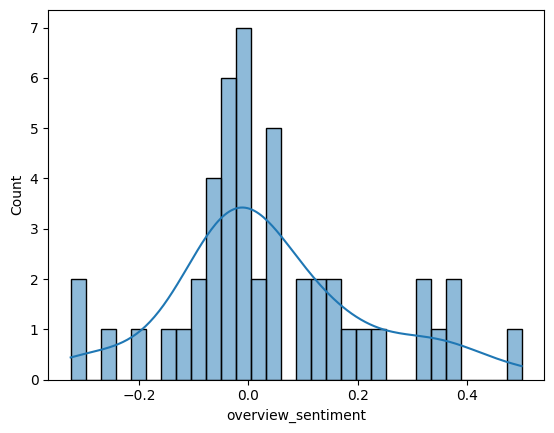

In [14]:
sns.histplot(df['overview_sentiment'], bins=30, kde=True)


In [16]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"{col} contains list data")


crew contains list data


In [17]:
list_cols = ['genres', 'cast', 'crew']  # Add any others you find

for col in list_cols:
    df[col] = df[col].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)


In [18]:
import sqlite3

conn = sqlite3.connect("movies.db")
df.to_sql("movies", conn, if_exists="replace", index=False)


47

In [19]:
query = "SELECT title, revenue FROM movies WHERE revenue > 100000000 ORDER BY revenue DESC LIMIT 5"
pd.read_sql(query, conn)


,title,revenue
0,Avatar,2.787965e+09
1,Titanic,1.845034e+09
2,The Avengers,1.519558e+09
3,Jurassic World,1.513529e+09
4,Furious 7,1.506249e+09
